### Pre-processing EEG data with MNE-Python
Datagenerated in BrainVision Recorder software (.vhdr, .eeg, .vmrk)

#### Packets and connections

In [ ]:
!git clone https://github.com/abner-lucas/preprocessing_EEG_with_MNE.git

#Connect to Google Drive to get raw data
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
#Install package
!pip install mne
!pip install autoreject
!pip install h5io

In [4]:
import mne
mne.set_log_level('error')

import glob
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

#### Loading data

In [6]:
#Dataset path in my GDrive or in local
path = f'/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/data_brainvision/'
#path = '../datasets/data_brainvision/'
subject = 'Metzler0006'

#Checking existence of all files
print(path + subject + '*')
n_files = len(glob.glob(path + subject + '*'))
if n_files < 3:
    print('There are missing files')
    #Stop running
    raise SystemExit

name_files = [subject + '.eeg', subject + '.vhdr', subject + '.vmrk']
files = [path + name for name in name_files]
files

/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/data_brainvision/Metzler0006*


['/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/data_brainvision/Metzler0006.eeg',
 '/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/data_brainvision/Metzler0006.vhdr',
 '/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/data_brainvision/Metzler0006.vmrk']

In [7]:
#Reading EEG files
raw_data = mne.io.read_raw_brainvision(files[1], preload=True) #Preloading raw data into memory
raw_data

<RawBrainVision | Metzler0006.eeg, 64 x 1516920 (1516.9 s), ~740.8 MB, data loaded>

In [8]:
#Get events point and its descriptors
events, event_dict = mne.events_from_annotations(raw_data)

#Load updated descriptors from json file
with open('/content/preprocessing_EEG_with_MNE/datasets/event_stimulus_new_dict.json', 'r') as f:
#with open('../datasets/event_stimulus_new_dict.json', 'r') as f:
    event_new_dict = json.load(f)

#Save events_stimulis with txt
#for i in range(len(events)):
#    with open(f'/content/preprocessing_EEG_with_MNE/datasets/{subject}_events.txt', 'a') as f:
#    with open(f'{subject}_events_stimulus.txt', 'a') as f:
#        f.write(str(events[i]) + '\n')       

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


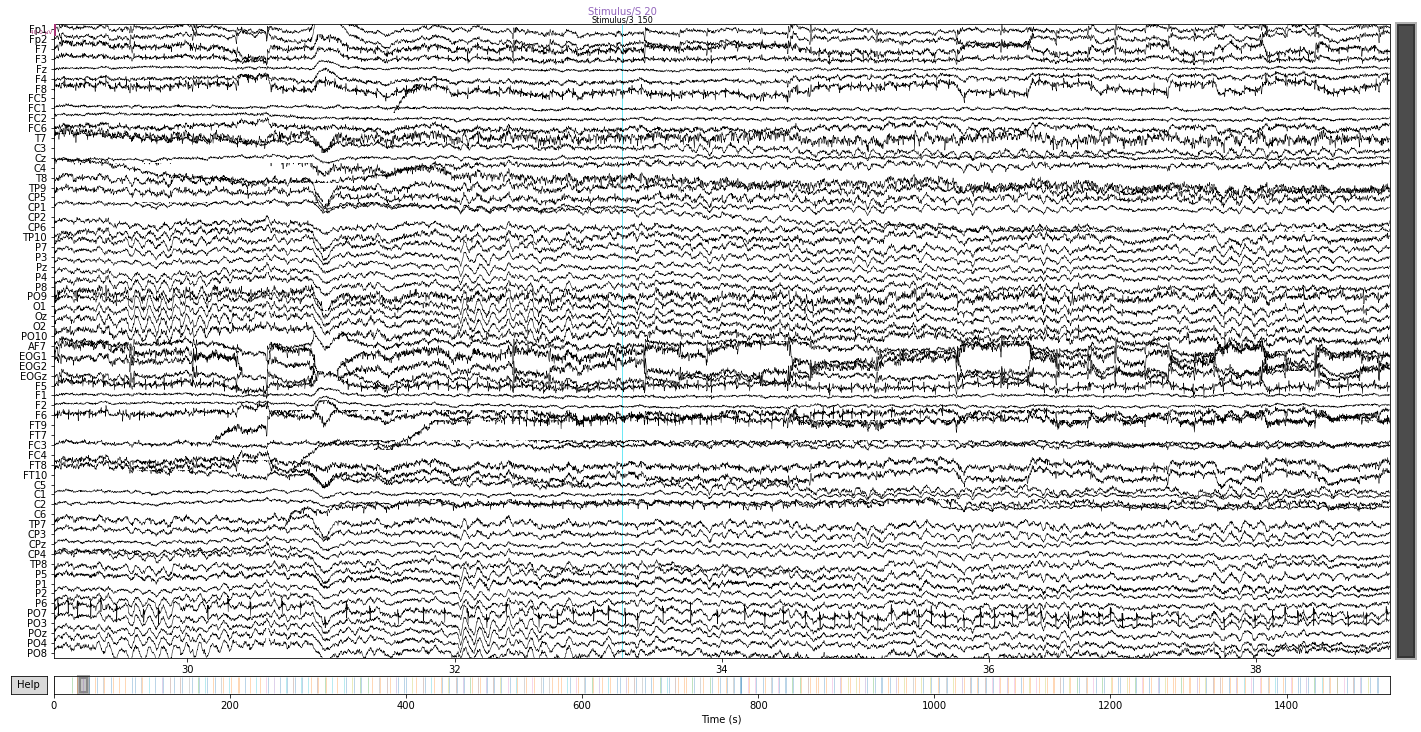

In [9]:
#Resizing plot figure
mne.set_config('MNE_BROWSE_RAW_SIZE','20,10')

#Plotting first 5s of raw data from all channels
fig1 = raw_data.plot(n_channels=64, start=29, duration=10, title='Signal raw data', events=events, event_id=event_new_dict);

#save figure
fig1.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig/fig1_signal_raw_data.png', dpi=600)
#fig1.savefig('outputs_fig/fig1_signal_raw_data.png', dpi=600)

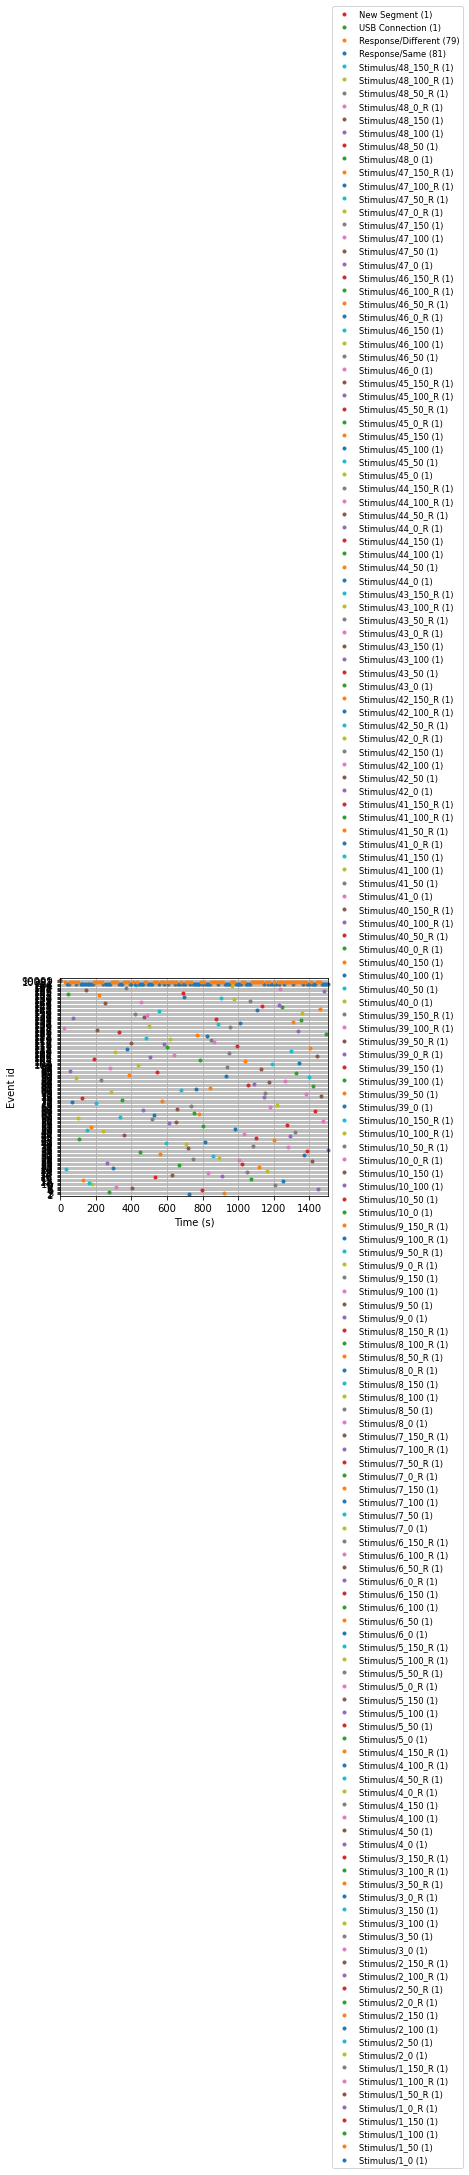

In [10]:
#Plotting events
fig2 = mne.viz.plot_events(events, event_id=event_new_dict, sfreq=raw_data.info['sfreq']);

#save figure
fig2.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig/fig2_events_point.png', dpi=600)
#fig2.savefig('outputs_fig/fig2_events_point.png', dpi=600)

#### Working with metadata

In [11]:
#Viewing keys in the raw data
raw_data.info.keys()

dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])

In [12]:
#Viewing dictionary of raw data
raw_data.__dict__

{'_annotations': <Annotations | 322 segments: Comment/no USB Connection to actiCAP (1), New ...>,
 '_cals': array([1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
        1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
        1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
        1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
        1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
        1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
        1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
        1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07]),
 '_comp': None,
 '_cropped_samp': 0,
 '_data': array([[ 5.360e-05,  5.190e-05,  4.990e-05, ...,  2.410e-05,  2.380e-05,
          2.470e-05],
        [ 1.003e-04,  9.780e-05,  9.660e-05, ..., -1.350e-05, -1.330e-05,
         -1.120e-05],
        [ 8.960e-05,  8.370e-05,  7.860e-05, ..., -4.460e-05, -4.690e-05,
   

In [13]:
#Viewing channel names
print(raw_data.info['ch_names'])

['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'TP9', 'CP5', 'CP1', 'CP2', 'CP6', 'TP10', 'P7', 'P3', 'Pz', 'P4', 'P8', 'PO9', 'O1', 'Oz', 'O2', 'PO10', 'AF7', 'EOG1', 'EOG2', 'EOGz', 'F5', 'F1', 'F2', 'F6', 'FT9', 'FT7', 'FC3', 'FC4', 'FT8', 'FT10', 'C5', 'C1', 'C2', 'C6', 'TP7', 'CP3', 'CPz', 'CP4', 'TP8', 'P5', 'P1', 'P2', 'P6', 'PO7', 'PO3', 'POz', 'PO4', 'PO8']


In [14]:
#Setting the reference channel for eyes movement
raw_data.set_channel_types({'EOG1': 'eog', 'EOG2': 'eog', 'EOGz': 'eog'})

<RawBrainVision | Metzler0006.eeg, 64 x 1516920 (1516.9 s), ~740.8 MB, data loaded>

In [15]:
#Setting the 10-20 pattern in the channel position
raw_data.set_montage('standard_1020')
raw_data.info['dig']

[<DigPoint |        LPA : (-82.5, -0.0, 0.0) mm     : head frame>,
 <DigPoint |     Nasion : (0.0, 114.0, 0.0) mm      : head frame>,
 <DigPoint |        RPA : (82.5, 0.0, -0.0) mm      : head frame>,
 <DigPoint |     EEG #1 : (-30.9, 114.6, 27.9) mm   : head frame>,
 <DigPoint |     EEG #3 : (28.4, 115.3, 27.7) mm    : head frame>,
 <DigPoint |     EEG #5 : (-56.4, 99.2, 25.1) mm    : head frame>,
 <DigPoint |    EEG #16 : (-71.9, 73.1, 25.8) mm    : head frame>,
 <DigPoint |    EEG #17 : (-66.1, 80.2, 53.8) mm    : head frame>,
 <DigPoint |    EEG #18 : (-51.8, 86.7, 78.7) mm    : head frame>,
 <DigPoint |    EEG #19 : (-29.0, 91.4, 96.6) mm    : head frame>,
 <DigPoint |    EEG #20 : (-1.2, 93.3, 102.6) mm    : head frame>,
 <DigPoint |    EEG #21 : (28.0, 91.9, 95.8) mm     : head frame>,
 <DigPoint |    EEG #22 : (50.3, 87.4, 77.3) mm     : head frame>,
 <DigPoint |    EEG #23 : (66.3, 81.5, 53.1) mm     : head frame>,
 <DigPoint |    EEG #24 : (71.4, 74.5, 25.1) mm     : head fra

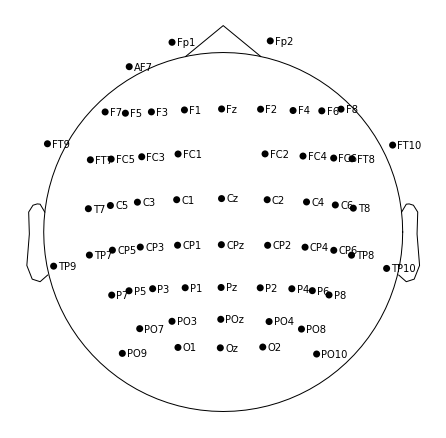

In [16]:
#Plotting the name and position of sensors
fig3 = raw_data.plot_sensors(show_names=True, title='Sensor positions - 10-20');

#save figure
fig3.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig/fig3_sensor_positions.png', dpi=600)
#fig3.savefig('outputs_fig/fig3_sensor_positions.png', dpi=600)

#### Stimulus

In [17]:
#Selecting only stimuli and response
events_clean = []
for i in range(len(events)):
    if i+1 < len(events):
        #If the event is not a subject response
        if (events[i][2] != 251) and (events[i][2] != 252):
            if (events[i+1][2] == 251) or (events[i+1][2] == 252):
                events_clean.append(events[i])
                events_clean.append(events[i+1])

#Selecting only stimuli without responses
stimulus_clean = [x for i, x in enumerate(events_clean) if i % 2 == 0]

if len(stimulus_clean) < 120:
    print('The subject performed less than 120 trials')
    #Stop running
    raise SystemExit
else:
    print('The subject performed 75% of the total trails')

#Descriptors that used
stimulus_clean_new_dict = {}
for key, value in event_new_dict.items():
    if value in [x[2] for x in stimulus_clean]:
        stimulus_clean_new_dict.update({key: value})

The subject performed 75% of the total trails


#### Filters

##### Resampling

In [18]:
#Downsampling (1000Hz to 250Hz)
#print('Frequency before resampling: ', raw_data.info['sfreq'], 'Hz')
#down_data = raw_data.copy().resample(250)
#print('Frequency after resampling: ', down_data.info['sfreq'], 'Hz')

#WARNING: Resampling from the data will influence ERPs.

##### Band-pass

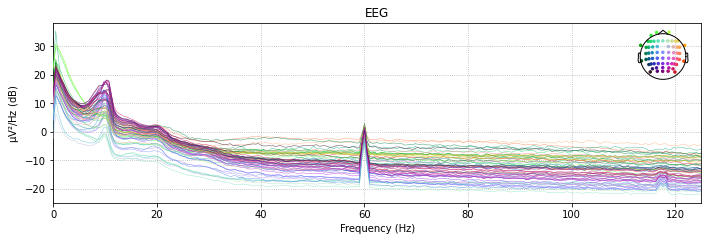

In [19]:
#Plotting the power spectral density
fig4 = raw_data.plot_psd(fmax=125);

#Save figure
fig4.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig/fig4_power_density_250Hz.png', dpi=600)
#fig4.savefig('outputs_fig/fig4_power_density_250Hz.png', dpi=600)

In [20]:
#Band-pass filter (high-pass = 0.1Hz and low-pass = 35Hz)
f_data = raw_data.copy().filter(l_freq=0.1, h_freq=35)

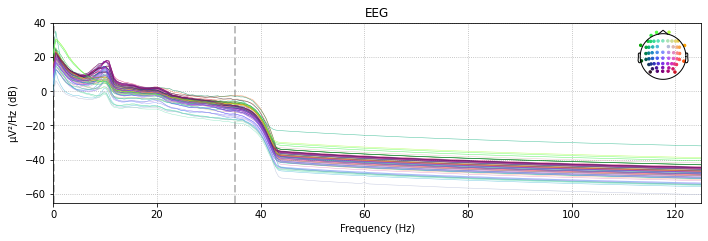

In [21]:
#Plotting the power spectral density
fig5 = f_data.plot_psd(fmax=125);

#Save figure
fig5.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig/fig5_power_density_35Hz.png', dpi=600)
#fig5.savefig('outputs_fig/fig5_power_density_35Hz.png', dpi=600)

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


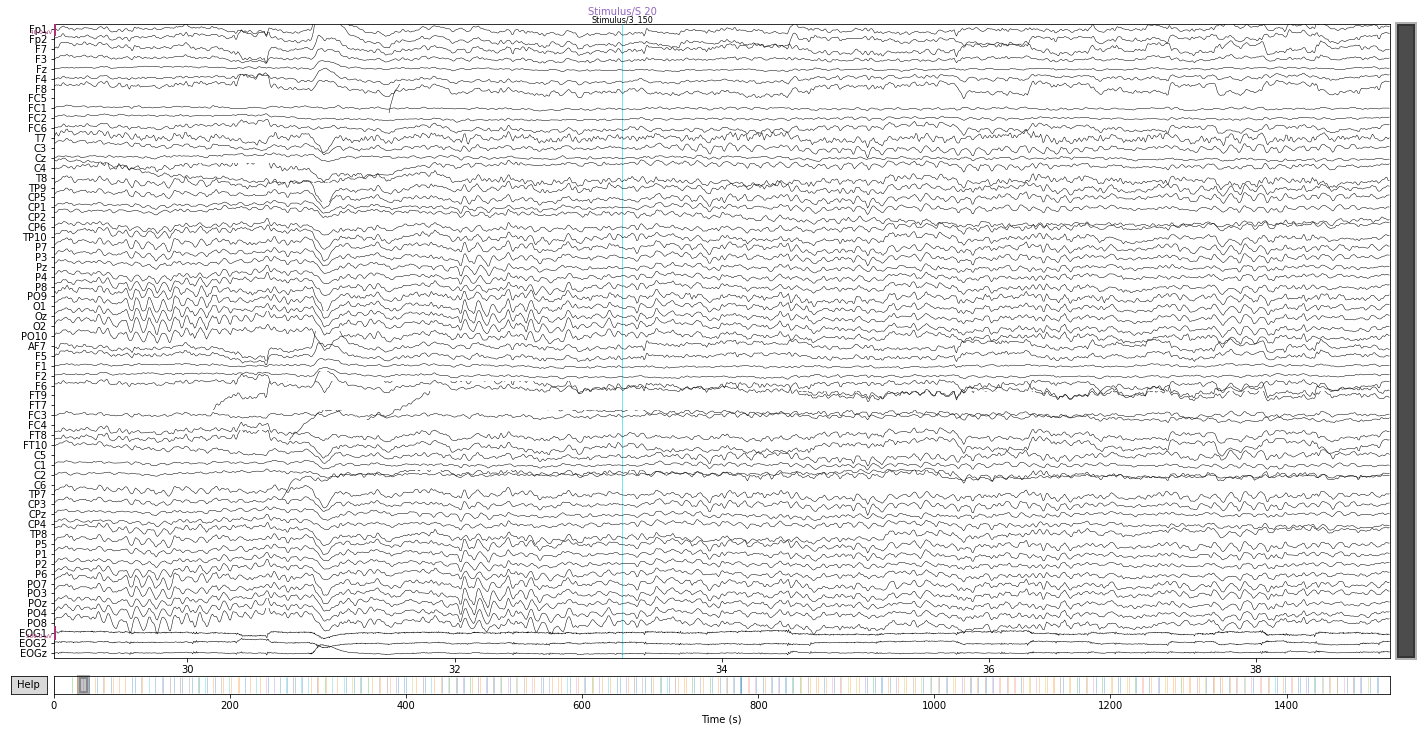

In [22]:
#Plotting filtered data
fig6 = f_data.plot(n_channels=64, start=29, duration=10, title='Filtered signal data', events=events, event_id=event_new_dict);

#Save figure
fig6.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig/fig6_filtered_signal_data.png', dpi=600)
#fig6.savefig('outputs_fig/fig6_filtered_signal_data.png', dpi=600)

##### Trials

In [23]:
#Segmenting ERP signal:
# - 200 ms before stimulus and 4000 ms after
# - Baseline correction by subtracting the mean potential amplitude from the 200 ms interval immediately preceding the stimulus at each epoch
tinitial = -0.2
tfinal = 4.0

picks = mne.pick_types(f_data.info, eeg=True, eog=True, stim=True, meg=False, ecg=False, exclude='bads')
epochs = mne.Epochs(f_data.copy(), stimulus_clean, stimulus_clean_new_dict, picks=picks,
                    tmin=tinitial, tmax=tfinal, baseline=None, preload=True)
#                    tmin=tinitial, tmax=tfinal, baseline=(None, 0), event_repeated='drop', preload=True)
epochs

<Epochs |  160 events (all good), -0.2 - 4 sec, baseline off, ~328.3 MB, data loaded,
 'Stimulus/1_0': 1
 'Stimulus/1_50': 1
 'Stimulus/1_100': 1
 'Stimulus/1_150': 1
 'Stimulus/1_0_R': 1
 'Stimulus/1_50_R': 1
 'Stimulus/1_100_R': 1
 'Stimulus/1_150_R': 1
 'Stimulus/2_0': 1
 'Stimulus/2_50': 1
 and 150 more events ...>

In [24]:
#Compute global rejection thresholds
#from autoreject import get_rejection_threshold

#bias_reject = get_rejection_threshold(epochs)
#bias_reject

In [25]:
#Delete epochs with high bias
#epochs.drop_bad(reject=bias_reject, flat=None)

#WARNING: Removing epochs from the data will influence ERPs.

##### PREP pipeline

In [26]:
#Selecting and rebuilding bad electrodes with interpolation (PREP pipeline)
from autoreject import Ransac   # noqa

ransac = Ransac(verbose=True)
epochs_clean = ransac.fit_transform(epochs)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min finished


In [27]:
#Bad electrodes
print(ransac.bad_chs_)

#Marking bad electrodes
epochs_clean.info['bads'] = ransac.bad_chs_

['FT9']


##### Evoked before the ICA

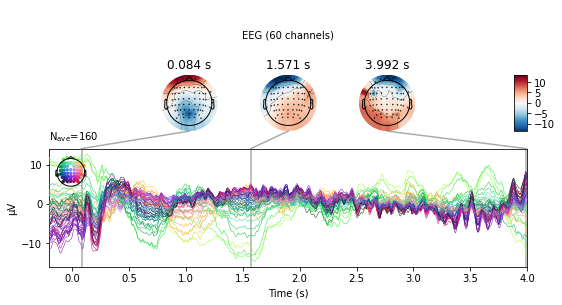

In [28]:
#Plotting the average of the epochs
evoked = epochs.average()
evoked_clean = epochs_clean.average()

fig7 = evoked_clean.detrend().plot_joint();

#save figure
fig7.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig/fig7_average_epochs.png', dpi=600)
#fig7.savefig('outputs_fig/fig7_average_epochs.png', dpi=600)

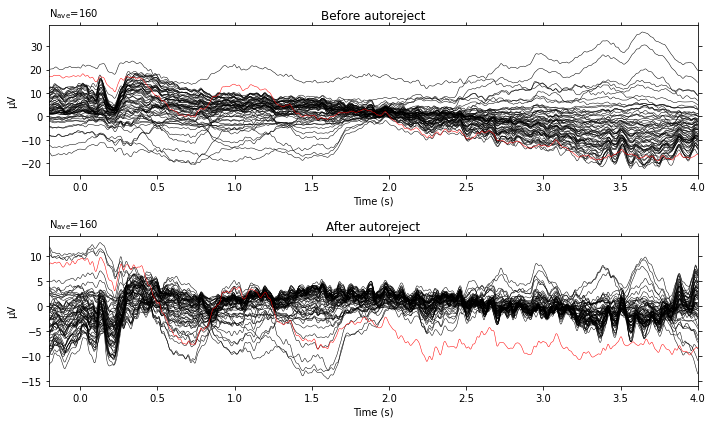

In [29]:
#Marking bad electrodes on the evoked
evoked.info['bads'] = ransac.bad_chs_
evoked_clean.info['bads'] = ransac.bad_chs_

fig8, axes = plt.subplots(2, 1, figsize=(10, 6))

for ax in axes:
    ax.tick_params(axis='x', which='both', bottom='off', top='off')
    ax.tick_params(axis='y', which='both', left='off', right='off')

evoked.plot(exclude=[], axes=axes[0], show=False)
axes[0].set_title('Before autoreject')
evoked_clean.plot(exclude=[], axes=axes[1], show=False)
axes[1].set_title('After autoreject')
plt.tight_layout()

#save figure
fig8.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig/fig8_evoked_epochs_clean.png', dpi=600)
#fig8.savefig('outputs_fig/fig8_evoked_epochs_clean.png', dpi=600)

##### ICA

In [30]:
#Filter high-pass
f_epochs_clean = epochs_clean.copy().filter(l_freq=1, h_freq=None)

In [31]:
# ICA parameters
random_state = 42       # ensures ICA is reproducable each time it's run
ica_n_components = .99  # Specify n_components as a decimal to set % explained variance

#Compute ICA
ica = mne.preprocessing.ICA(n_components=ica_n_components, random_state=random_state)
#ica.fit(f_epochs_clean, reject=bias_reject, tstep=tfinal)
ica.fit(f_epochs_clean, tstep=tfinal)

<ICA | epochs decomposition, method: fastica (fit in 51 iterations on 672160 samples), 20 ICA components explaining 99.1 % of variance (60 PCA components available), channel types: eeg, no sources marked for exclusion>

In [32]:
#Detect EOG related components using correlation
eog_idx, eog_scores = ica.find_bads_eog(f_epochs_clean, ch_name=['EOG1', 'EOG2', 'EOGz'])
print(eog_idx)

[0, 2]


In [33]:
#Detect automatically ECG related components using correlation
#We don't have ECG reference channels

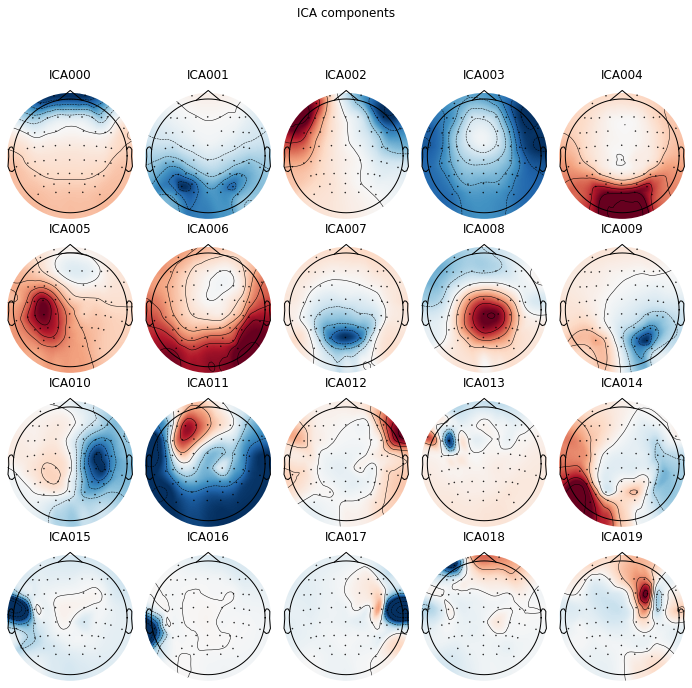

In [34]:
#Plot components
fig9 = ica.plot_components();

#save figures
for i, fig in enumerate(fig9):
    fig9[i].savefig(f'/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig/fig9_ica_components_part{i+1}.png', dpi=600)
#    fig9[i].savefig(f'outputs_fig/fig9_ica_components_part{i+1}.png', dpi=600)

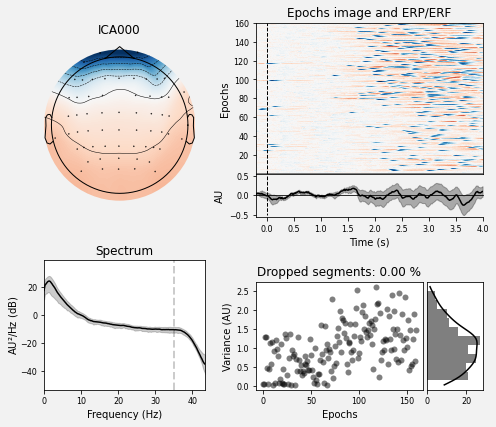

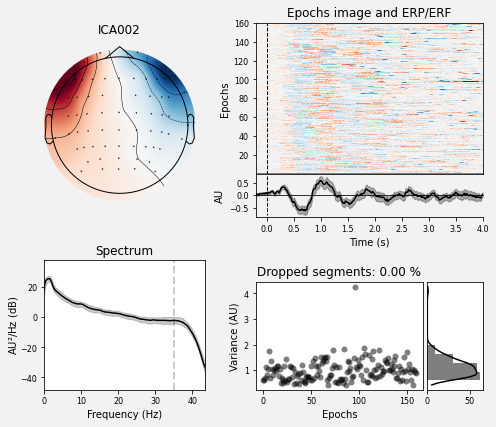

In [35]:
#Plot in the topography of the components in eog_idx
fig10 = ica.plot_properties(f_epochs_clean, eog_idx);

#save figure
for i, (component, fig) in enumerate(zip(eog_idx, fig10)):
    fig10[i].savefig(f'/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig/fig10_removed_ica_{component}_properties.png', dpi=600)
#    fig10[i].savefig(f'outputs_fig/fig10_removed_ica_{component}_properties.png', dpi=600)

In [36]:
#Exclude EOG-related components
ica.exclude = eog_idx

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


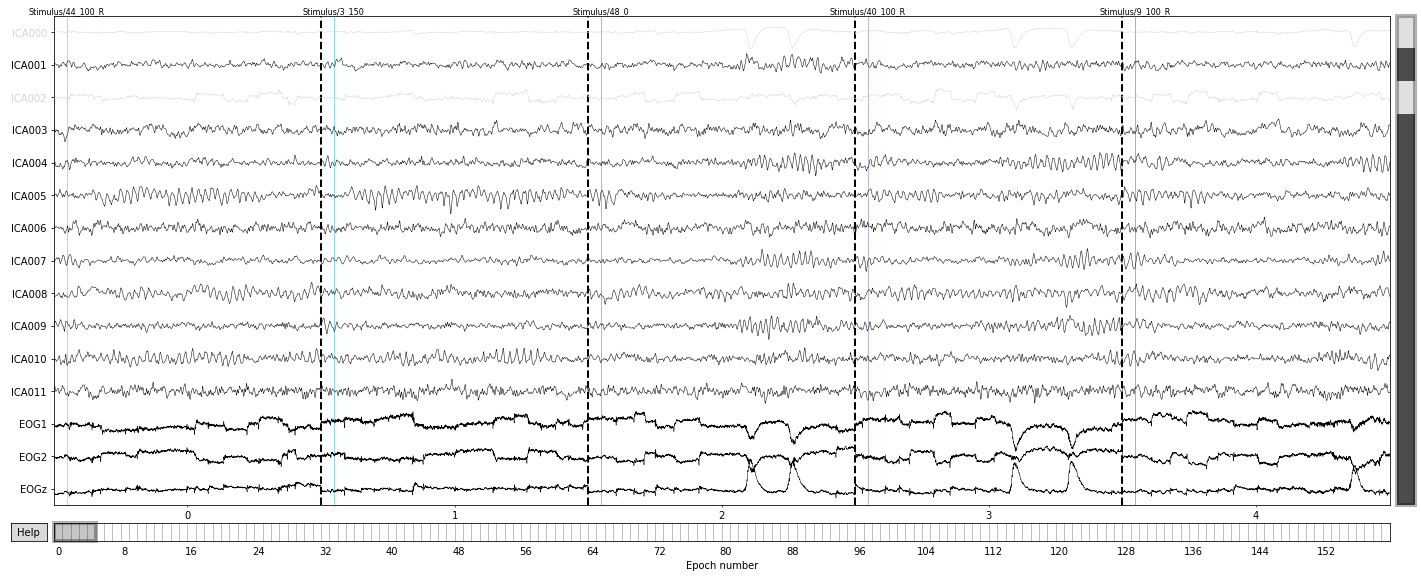

In [37]:
#Resizing plot figure
mne.set_config('MNE_BROWSE_RAW_SIZE','20,8')

#Plot the first components
fig11 = ica.plot_sources(f_epochs_clean, picks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], start=0, stop=5);

#save figure
fig11.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig/fig11_ica_sources_epochs_clean.png', dpi=600)
#fig11.savefig('outputs_fig/fig11_ica_sources_epochs_clean.png', dpi=600)

In [38]:
#Apply ICA to the data
f_epochs_clean_ica = ica.apply(f_epochs_clean.copy(), exclude=ica.exclude)

##### Baseline correction

In [39]:
f_epochs_clean_ica.apply_baseline(baseline=(None, 0))

<Epochs |  160 events (all good), -0.2 - 4 sec, baseline -0.2 – 0 sec, ~328.3 MB, data loaded,
 'Stimulus/1_0': 1
 'Stimulus/1_50': 1
 'Stimulus/1_100': 1
 'Stimulus/1_150': 1
 'Stimulus/1_0_R': 1
 'Stimulus/1_50_R': 1
 'Stimulus/1_100_R': 1
 'Stimulus/1_150_R': 1
 'Stimulus/2_0': 1
 'Stimulus/2_50': 1
 and 150 more events ...>

##### CAR

In [40]:
#Apply CAR (common average reference)
f_epochs_clean_ica_car = f_epochs_clean_ica.copy().set_eeg_reference('average', ch_type='eeg', projection=True)
f_epochs_clean_ica_car.apply_proj();

##### Comparation before/after the are ICA-CAR

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


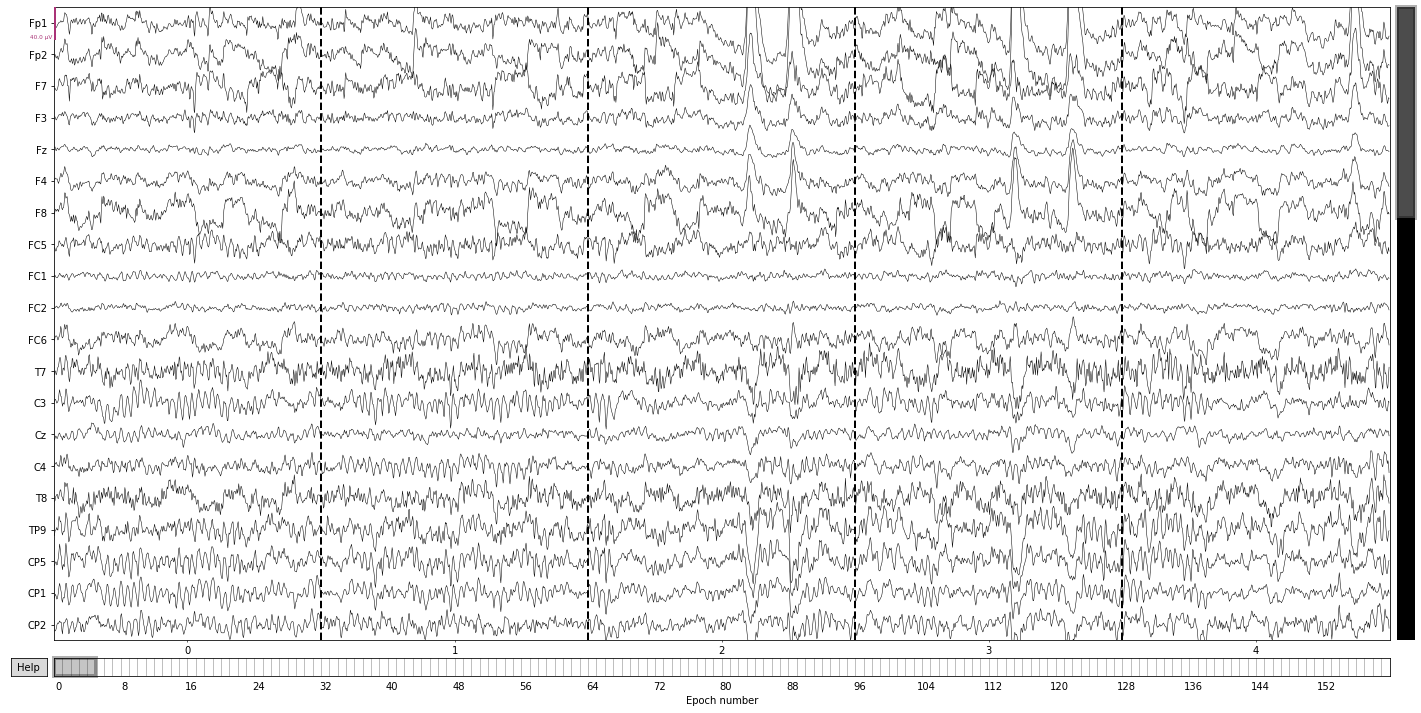

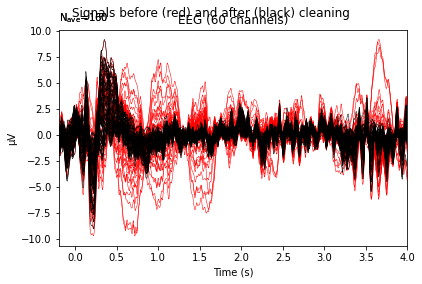

In [41]:
#Resizing plot figure
mne.set_config('MNE_BROWSE_RAW_SIZE','20,10')

#Filtered data before ICA-CAR
fig12 = f_epochs_clean.plot(n_epochs=5);
fig13 = ica.plot_overlay(f_epochs_clean.average());

#save figures
fig12.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig/fig12_filtered_signal_data_before_ica_car.png', dpi=600)
#fig12.savefig('outputs_fig/fig12_filtered_signal_data_before_ica_car.png', dpi=600)
fig13.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig/fig13_overlay_filtered_signal_data_before_ica_car.png', dpi=600)
#fig13.savefig('outputs_fig/fig13_overlay_filtered_signal_data_before_ica_car.png', dpi=600)

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


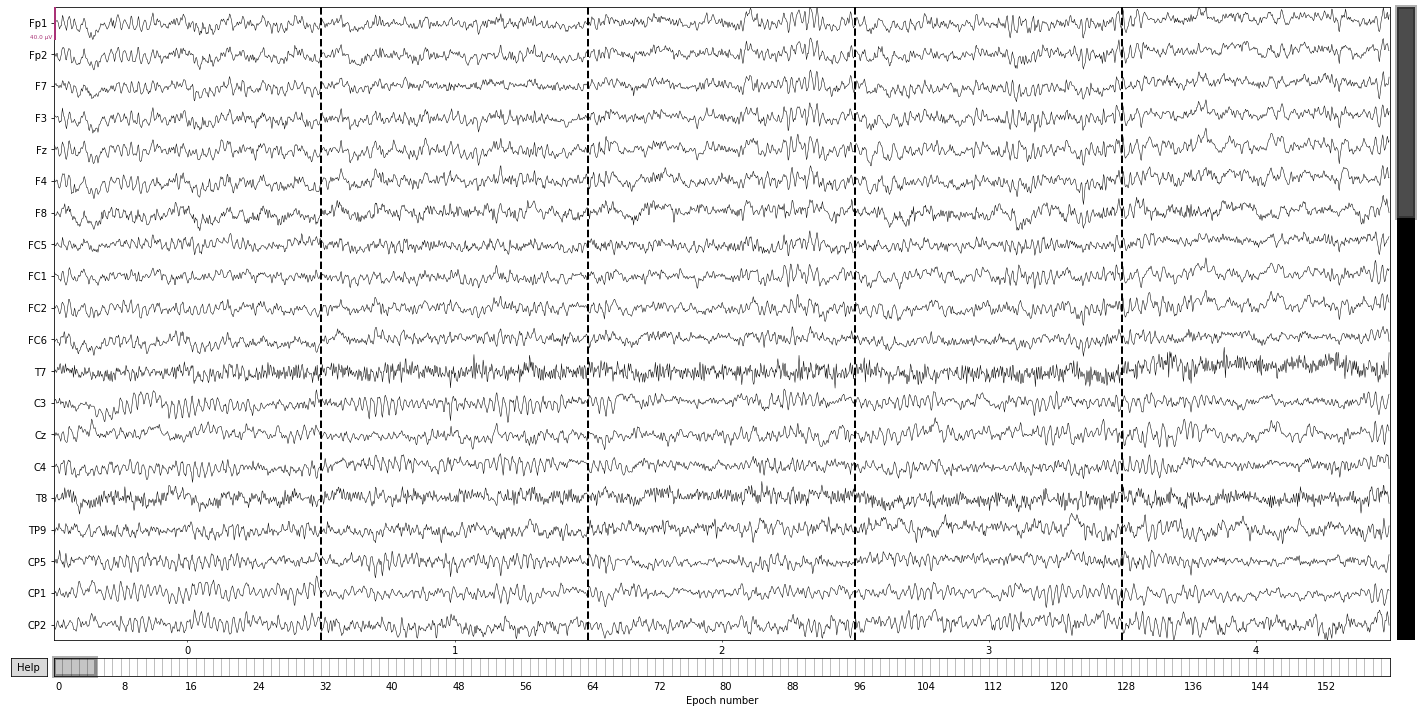

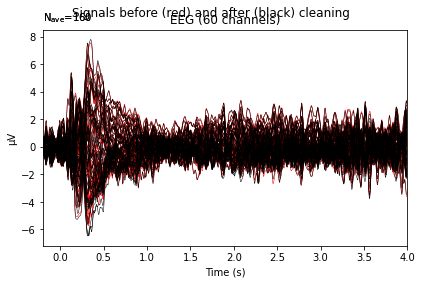

In [42]:
#Resizing plot figure
mne.set_config('MNE_BROWSE_RAW_SIZE','20,10')

#Filtered data after ICA-CAR
fig14 = f_epochs_clean_ica_car.plot(n_epochs=5);
fig15 = ica.plot_overlay(f_epochs_clean_ica_car.average());

#save figures
fig14.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig/fig14_filtered_signal_data_after_ica_car.png', dpi=600)
#fig14.savefig('outputs_fig/fig14_filtered_signal_data_after_ica_car.png', dpi=600)
fig15.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig/fig15_overlay_filtered_signal_data_after_ica_car.png', dpi=600)
#fig15.savefig('outputs_fig/fig15_overlay_filtered_signal_data_after_ica_car.png', dpi=600)

#### Selecting channels

In [43]:
#Selecting only the frontal, parietal, and reference lobe channels for eye movement
p_f_data = f_epochs_clean_ica_car.copy().pick_channels(['F1','F2','F3','F4','F5','F6','F7','F8','Fz','P1','P2','P3','P4','P5','P6','P7','P8','Pz'])
p_f_data.info

<Info | 9 non-empty values
 bads: []
 ch_names: F7, F3, Fz, F4, F8, P7, P3, Pz, P4, P8, F5, F1, F2, F6, P5, P1, ...
 chs: 18 EEG
 custom_ref_applied: False
 dig: 64 items (3 Cardinal, 61 EEG)
 highpass: 1.0 Hz
 lowpass: 35.0 Hz
 meas_date: 2016-01-20 14:49:35 UTC
 nchan: 18
 projs: Average EEG reference: on
 sfreq: 1000.0 Hz
>

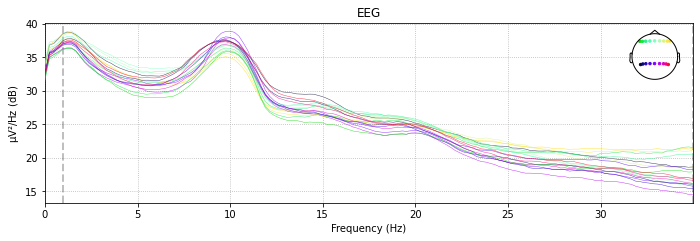

In [44]:
#Plotting filtered data from selected channels
fig16 = p_f_data.plot_psd(fmin=0, fmax=35, spatial_colors=True);

#save figure
fig16.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig/fig16_psd_filtered_data_selected_channels.png', dpi=600)
#fig16.savefig('outputs_fig/fig16_psd_filtered_data_selected_channels.png', dpi=600)

#### Performance individual

In [45]:
stimulus_idxs_events = []
for i, x in enumerate(events_clean):
    for y in stimulus_clean:
        if (x == y).all():
            stimulus_idxs_events.append(i)
            break

response_time = []
for i in range(len(stimulus_idxs_events)):
    response_time.append(events_clean[stimulus_idxs_events[i]+1][0] - events_clean[stimulus_idxs_events[i]][0])

stimulus_name = []
for i in range(len(stimulus_idxs_events)):
    for key, value in stimulus_clean_new_dict.items():
        if stimulus_clean[i][2] == value:
            stimulus_name.append(key)

responses_expected = []
responses_obtained = []
for i, name in enumerate(stimulus_name):
    if name[-1] == 'R':
        responses_expected.append('different')
    else:
        responses_expected.append('same')

    if events_clean[stimulus_idxs_events[i]+1][2] == 251:
        responses_obtained.append('same')
    else:
        responses_obtained.append('different')

n = len(responses_expected)
acc = 0
for i in range(n):
    if responses_expected[i] == responses_obtained[i]:
        acc += 1
accuracy = acc/n
print('Accuracy in the answers: ' + str(accuracy*100) + '%')

response_time_mean = np.mean(response_time)
print('Mean response time: ' + str(response_time_mean) + 'ms')


Accuracy in the answers: 91.875%
Mean response time: 2202.1875ms


#### Save dataset final

In [47]:
df_targets = pd.read_csv('/content/preprocessing_EEG_with_MNE/datasets/list_subjects_groups.csv', dtype=str)
#df_targets = pd.read_csv('../datasets/list_subjects_groups.csv', dtype=str)
list_control = df_targets['subject_control'].tolist()
list_gifted = df_targets['subject_gifted'].tolist()

num_subject = str(subject[-4:])
if num_subject in list_control:
    group_subject = 'control'
elif num_subject in list_gifted:
    group_subject = 'gifted'
else:
    group_subject = 'undefined'

df_ip = pd.DataFrame()     
df_ip['condition'] = stimulus_name
df_ip['response_expected'] = responses_expected
df_ip['response_obtained'] = responses_obtained
df_ip['response_time'] = response_time
df_ip.insert(0, 'subject', num_subject)
df_ip.insert(1, 'group', group_subject)
df_ip

subject    group           stimulus responses_expected responses_obtained
0      0006  control  Stimulus/44_100_R          different          different
1      0006  control     Stimulus/3_150               same               same
2      0006  control      Stimulus/48_0               same               same
3      0006  control  Stimulus/40_100_R          different          different
4      0006  control   Stimulus/9_100_R          different          different
..      ...      ...                ...                ...                ...
155    0006  control    Stimulus/10_150               same               same
156    0006  control       Stimulus/8_0               same               same
157    0006  control    Stimulus/48_100               same               same
158    0006  control    Stimulus/44_100               same               same
159    0006  control     Stimulus/5_100               same               same

[160 rows x 5 columns]

In [48]:
df_eeg = p_f_data.to_data_frame()
df_eeg = df_eeg.rename(columns={"epoch":"trail"})
df_eeg.insert(0, 'subject_name', num_subject)
df_eeg.insert(1, 'group', group_subject)

#Change time column to datetime type
#df_eeg['time'] = pd.to_datetime(df_eeg['time'], unit='ms')

#Change dataframe index to a time column
#df_eeg.index = df_eeg.time
#df_eeg.drop(['time'], axis=1, inplace=True)

#To save the dataframe in a .csv file
#df_eeg.to_csv('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/' + subject + '_epochs_clean.csv')
#dt_eeg.to_csv('' + subject + '_epochs_clean.csv')

df_eeg

subject_name    group  time          condition  trail        F7  \
0              0006  control  -200  Stimulus/44_100_R      0 -2.024170   
1              0006  control  -199  Stimulus/44_100_R      0 -1.634562   
2              0006  control  -198  Stimulus/44_100_R      0 -1.270319   
3              0006  control  -197  Stimulus/44_100_R      0 -0.936960   
4              0006  control  -196  Stimulus/44_100_R      0 -0.639563   
...             ...      ...   ...                ...    ...       ...   
672155         0006  control  3996     Stimulus/5_100    159  4.061394   
672156         0006  control  3997     Stimulus/5_100    159  4.358932   
672157         0006  control  3998     Stimulus/5_100    159  4.589340   
672158         0006  control  3999     Stimulus/5_100    159  4.741787   
672159         0006  control  4000     Stimulus/5_100    159  4.809066   

              F3        Fz        F4        F8  ...        P4        P8  \
0       1.497280  3.822360 -0.748300 -3.671111  ...  1.387362  0.190492   
1       2.131246  4.433735 -0.142861 -3.427730  ...  0.897545 -0.131296   
2       2.687988  4.957545  0.395389 -3.216192  ...  0.461801 -0.427370   
3       3.159956  5.392669  0.860031 -3.047807  ...  0.076279 -0.698358   
4       3.543372  5.740009  1.247226 -2.931021  ... -0.264888 -0.945959   
...          ...       ...       ...       ...  ...       ...       ...   
672155  5.191215  3.252876  3.674304  1.490051  ... -5.574006 -5.576710   
672156  5.712737  3.054906  3.049882  1.405319  ... -5.613307 -5.292105   
672157  6.199721  2.861887  2.452391  1.270907  ... -5.653549 -5.064984   
672158  6.638049  2.677102  1.895661  1.088829  ... -5.690140 -4.898357   
672159  7.012507  2.503435  1.392113  0.866922  ... -5.718086 -4.792684   

              F5        F1        F2        F6        P5        P1        P2  \
0      -1.837346  3.932155  2.134490 -2.427134 -5.743002  1.248960  1.076860   
1      -1.362289  4.513768  2.630161 -2.226765 -5.732566  1.180353  0.537472   
2      -0.917982  5.008583  3.039250 -2.064911 -5.686483  1.108317  0.050906   
3      -0.512324  5.413824  3.362669 -1.943026 -5.601733  1.029839 -0.378766   
4      -0.149786  5.729369  3.604119 -1.860712 -5.476252  0.943282 -0.749086   
...          ...       ...       ...       ...       ...       ...       ...   
672155  8.737731  4.250633  3.008137  1.979633  0.748201  0.434351 -4.448065   
672156  8.260384  4.411114  2.697376  2.104185  0.495997  0.262590 -4.586821   
672157  7.666944  4.567766  2.411068  2.242559  0.282251  0.081961 -4.691755   
672158  6.983655  4.715266  2.152239  2.389193  0.106403 -0.106103 -4.755076   
672159  6.237808  4.848129  1.923180  2.538829 -0.033705 -0.299249 -4.770440   

              P6  
0       0.093555  
1      -0.380528  
2      -0.794319  
3      -1.150204  
4      -1.452719  
...          ...  
672155 -6.294098  
672156 -6.128467  
672157 -5.984698  
672158 -5.861361  
672159 -5.755639  

[672160 rows x 23 columns]

#### Evoked after the ICA

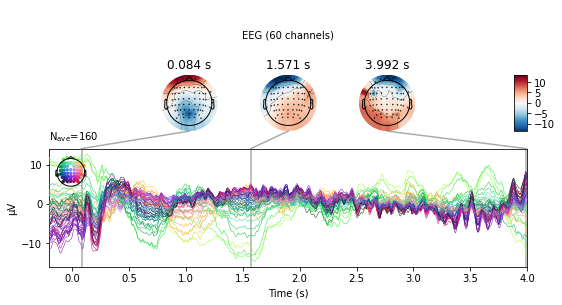

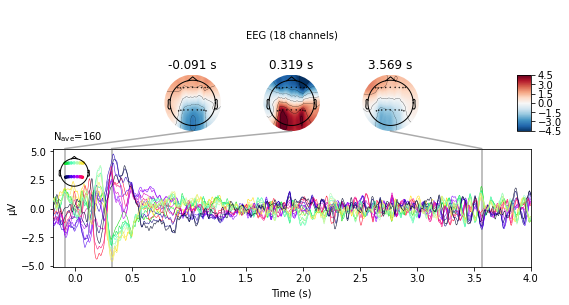

In [49]:
#Compare evokeds before and after ICA
evoked = epochs_clean.average()
evoked_clean = p_f_data.average()

fig17 = evoked.detrend().plot_joint();
fig18 = evoked_clean.detrend().plot_joint();

fig17.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig/fig17_evoked_epochs_clean_before_ICA.png', dpi=600)
#fig17.savefig('outputs_fig/fig17_evoked_epochs_clean_before_ICA.png', dpi=600)
fig18.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig/fig18_evoked_epochs_clean_after_ICA.png', dpi=600)
#fig18.savefig('outputs_fig/fig18_evoked_epochs_clean_after_ICA.png', dpi=600)